In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pd.set_option('display.max_columns', None) 

# **1.EDA**

**1.1 Concat train and test**

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df = pd.concat([train,test])
print(train.shape[0])
print(test.shape[0])
print(df.shape[0])


1460
1459
2919


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**1.2 split categorical and numerical columns**

In [5]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
print(cat_cols)
print(len(cat_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [6]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols.remove('Id')
print(num_cols)
print(len(num_cols))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
37


In [7]:
cat_but_card = [col for col in cat_cols if df[col].nunique() > 10]
print(cat_but_card)
print(len(cat_but_card))

['Neighborhood', 'Exterior1st', 'Exterior2nd']
3


In [8]:
for col in cat_but_card:
    print(df[col].value_counts())

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64
Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64


all cardinals seems categorical

In [9]:
num_but_cat = [col for col in num_cols if df[col].nunique() < 20]
print(num_but_cat)
print(len(num_but_cat))

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
15


In [10]:
for col in num_but_cat:
    print(df[col].value_counts())
# read explanation of cols 1 by 1
# MSSubClass: Identifies the type of dwelling involved in the sale -> categorical
# OverallQual: Rates the overall material and finish of the house -> categorical
# OverallCond: Rates the overall condition of the house -> categorical
# BsmtFullBath: Basement full bathrooms -> categorical
# BsmtHalfBath: Basement half bathrooms -> categorical
# FullBath -> categorical
# HalfBath -> categorical
# BedroomAbvGr -> total bedroom above grade
# KitchenAbvGr -> total kitchen above grade
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces -> 
# GarageCars: Size of garage in car capacity -> 
# PoolArea: Pool area in square feet -> may be categorical
# MoSold: Month Sold -> ?
# YrSold: Year Sold -> ?


MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64
OverallQual
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64
OverallCond
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: count, dtype: int64
BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64
BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64
FullBath
2    1530
1    1309
3      64
0      12
4       4
Name: count, dtype: int64
HalfBath
0    1834
1    1060
2      25
Name: count, dtype: int64
BedroomAbvGr
3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: count, dtype: int64
KitchenAbvGr
1    2785
2     129
0       3
3       2
Name: count, dtype: i

In [11]:
for col in num_but_cat:
    cat_cols.append(col)
    num_cols.remove(col)

num_cols.remove('SalePrice')

In [12]:
print(cat_cols)
print(len(cat_cols))
print(num_cols)
print(len(num_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
58
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', '

1.3 Gerekli düzenlemeleri yapınız

In [13]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   YearBuilt      2919 non-null   int64  
 3   YearRemodAdd   2919 non-null   int64  
 4   MasVnrArea     2896 non-null   float64
 5   BsmtFinSF1     2918 non-null   float64
 6   BsmtFinSF2     2918 non-null   float64
 7   BsmtUnfSF      2918 non-null   float64
 8   TotalBsmtSF    2918 non-null   float64
 9   1stFlrSF       2919 non-null   int64  
 10  2ndFlrSF       2919 non-null   int64  
 11  LowQualFinSF   2919 non-null   int64  
 12  GrLivArea      2919 non-null   int64  
 13  GarageYrBlt    2760 non-null   float64
 14  GarageArea     2918 non-null   float64
 15  WoodDeckSF     2919 non-null   int64  
 16  OpenPorchSF    2919 non-null   int64  
 17  EnclosedPorch  2919 non-null   int64  
 18  3SsnPorch    

In [14]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   Street         2919 non-null   object 
 2   Alley          198 non-null    object 
 3   LotShape       2919 non-null   object 
 4   LandContour    2919 non-null   object 
 5   Utilities      2917 non-null   object 
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  BldgType       2919 non-null   object 
 12  HouseStyle     2919 non-null   object 
 13  RoofStyle      2919 non-null   object 
 14  RoofMatl       2919 non-null   object 
 15  Exterior1st    2918 non-null   object 
 16  Exterior2nd    2918 non-null   object 
 17  MasVnrType     1153 non-null   object 
 18  ExterQual    

In [15]:
cardinal_cols = [col for col in cat_cols if df[col].dtype != 'O']
print(cardinal_cols)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


**1.4 Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz**

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'Mis

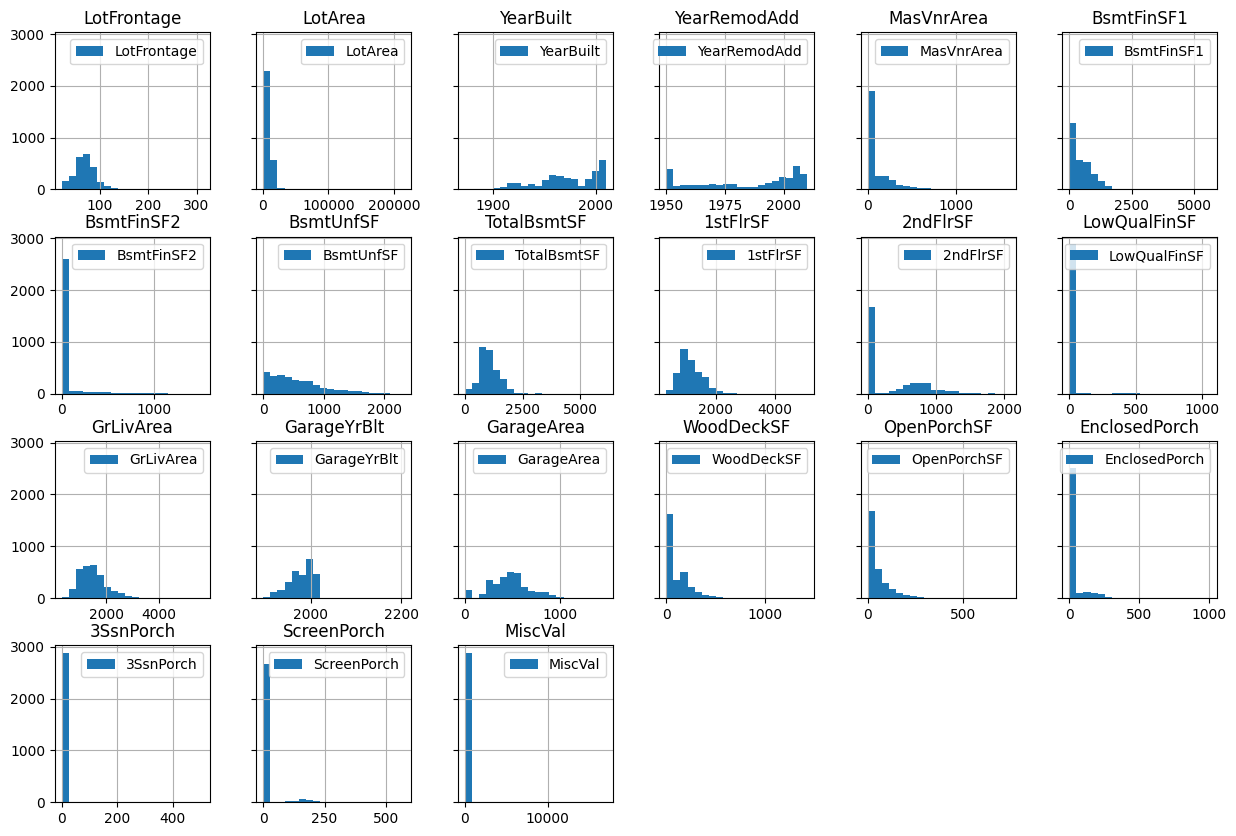

In [16]:
df[num_cols].hist(legend=True,layout=(4,6),figsize = (15,10),sharex=False,
    sharey=True,bins=20)

In [17]:
for col in cat_cols:
    print(df.groupby(col).agg({'SalePrice':'mean'}))

              SalePrice
MSZoning               
C (all)    74528.000000
FV        214014.061538
RH        131558.375000
RL        191004.994787
RM        126316.830275
            SalePrice
Street               
Grvl    130190.500000
Pave    181130.538514
           SalePrice
Alley               
Grvl   122219.080000
Pave   168000.585366
              SalePrice
LotShape               
IR1       206101.665289
IR2       239833.365854
IR3       216036.500000
Reg       164754.818378
                 SalePrice
LandContour               
Bnk          143104.079365
HLS          231533.940000
Low          203661.111111
Lvl          180183.746758
              SalePrice
Utilities              
AllPub     180950.95682
NoSeWa     137500.00000
               SalePrice
LotConfig               
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
               SalePrice
LandSlope               
Gtl        179956.799566
Mod     

**1.5 check outliers**

In [18]:
def IQR(df,col,low = 0.25,up = 0.75):
    q1 = df[col].quantile(low)
    q3 = df[col].quantile(up)
    IQR_RANGE = q3-q1
    
    low_limit = q1 - 1.5*IQR_RANGE
    up_limit = q3 + 1.5*IQR_RANGE
    
    return low_limit,up_limit


In [19]:
for col in num_cols:
    low , up = IQR(df,col,0.05,0.95)
    print( col , df.loc[ (df[col] < low) | (df[col] > up),col ].shape[0] )

LotFrontage 2
LotArea 24
YearBuilt 0
YearRemodAdd 0
MasVnrArea 6
BsmtFinSF1 2
BsmtFinSF2 6
BsmtUnfSF 0
TotalBsmtSF 2
1stFlrSF 3
2ndFlrSF 0
LowQualFinSF 40
GrLivArea 2
GarageYrBlt 1
GarageArea 0
WoodDeckSF 3
OpenPorchSF 6
EnclosedPorch 3
3SsnPorch 37
ScreenPorch 5
MiscVal 103


**1.6 check missing values**

In [20]:
df[num_cols].isnull().sum()

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageYrBlt      159
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
dtype: int64

In [21]:
df[cat_cols].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
MSSubClass          0
OverallQual         0
OverallCon

# **2.Feature Engineering**

**2.1 handle outliers and missing values**

In [22]:
df.groupby("MSZoning").agg({"SalePrice":"mean"})

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


In [23]:
df.loc[df["MSZoning"].isna(),["MSZoning","SalePrice"]]

,MSZoning,SalePrice
455,NaN,NaN
756,NaN,NaN
790,NaN,NaN
1444,NaN,NaN


In [24]:
df["Alley"] = df["Alley"].fillna("No_alley")
df["Alley"].isnull().sum()

0

In [25]:
df.loc[df["Utilities"].isna(),["Utilities","SalePrice"]]

,Utilities,SalePrice
455,NaN,NaN
485,NaN,NaN


In [26]:
df.loc[df["Exterior1st"].isna(),["Exterior1st","SalePrice"]]

,Exterior1st,SalePrice
691,NaN,NaN


In [27]:
df.loc[df["Exterior2nd"].isna(),["Exterior2nd","SalePrice"]]

,Exterior2nd,SalePrice
691,NaN,NaN


In [28]:
df["MasVnrType"] = df["MasVnrType"].fillna("No_veneer")
df["MasVnrType"].isnull().sum()

0

In [29]:
df.loc[df["BsmtCond"].isna(),["BsmtQual","BsmtCond","SalePrice"]]

,BsmtQual,BsmtCond,SalePrice
17,NaN,NaN,90000.0
39,NaN,NaN,82000.0
90,NaN,NaN,109900.0
102,NaN,NaN,118964.0
156,NaN,NaN,109500.0
...,...,...,...
1343,NaN,NaN,NaN
1344,NaN,NaN,NaN
1364,NaN,NaN,NaN
1431,NaN,NaN,NaN


In [30]:
df["BsmtQual"] = df["BsmtQual"].fillna("No_basement")
df["BsmtQual"].isnull().sum()

0

In [31]:
df["BsmtCond"] = df["BsmtCond"].fillna("No_basement")
df["BsmtCond"].isnull().sum()


0

In [32]:
df["BsmtExposure"] = df["BsmtExposure"].fillna("No_basement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No_basement")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No_basement")


In [33]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("No_fireplace")
df["FireplaceQu"].isnull().sum()

0

In [34]:
df["GarageType"] = df["GarageType"].fillna("No_garage")
df["GarageFinish"] = df["GarageFinish"].fillna("No_garage")
df["GarageQual"] = df["GarageQual"].fillna("No_garage")
df["GarageCond"] = df["GarageCond"].fillna("No_garage")


In [35]:
df["PoolQC"] = df["PoolQC"].fillna("No_pool")
df["Fence"] = df["Fence"].fillna("No_fence")
df["MiscFeature"] = df["MiscFeature"].fillna("No_feature")


In [36]:
df[cat_cols].isnull().sum()

MSZoning         4
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      1
Functional       2
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         1
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd

In [37]:
df.drop("GarageYrBlt" , axis = 1 , inplace = True)
num_cols.remove("GarageYrBlt")

In [38]:
df[num_cols].isnull().sum()

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
dtype: int64

In [39]:
missing_values = df[df.columns.difference(["SalePrice"])].apply(lambda x : x.isnull() , axis = 0).sum(axis = 1)

missing_values = missing_values.apply(lambda x: bool(x))

df[missing_values]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,No_alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,No_pool,No_fence,Shed,350,11,2009,WD,Normal,200000.0
12,13,20,RL,NaN,12968,Pave,No_alley,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,No_veneer,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,No_fireplace,Detchd,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,No_pool,No_fence,No_feature,0,9,2008,WD,Normal,144000.0
14,15,20,RL,NaN,10920,Pave,No_alley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,No_pool,GdWo,No_feature,0,5,2008,WD,Normal,157000.0
16,17,20,RL,NaN,11241,Pave,No_alley,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,No_pool,No_fence,Shed,700,3,2010,WD,Normal,149000.0
24,25,20,RL,NaN,8246,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,No_veneer,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,No_pool,MnPrv,No_feature,0,5,2010,WD,Normal,154000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,2863,20,RL,75.0,8050,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,No_veneer,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,No_fireplace,No_garage,No_garage,0.0,0.0,No_garage,No_garage,N,32,0,0,0,0,0,No_pool,No_fence,No_feature,0,4,2006,WD,Normal,NaN
1440,2901,20,RL,NaN,50102,Pave,No_alley,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,No_veneer,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,909.0,Unf,0.0,723.0,1632.0,GasA,TA,Y,SBrkr,1650,0,0,1650,1.0,0.0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,Unf,2.0,518.0,TA,TA,Y,0,0,0,0,138,0,No_pool,No_fence,No_feature,0,3,2006,WD,Alloca,NaN
1441,2902,20,RL,NaN,8098,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,No_veneer,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136.0,BLQ,116.0,129.0,1381.0,GasA,Ex,Y,SBrkr,1403,0,0,1403,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_fireplace,Attchd,

In [40]:
num_cols.remove("LotFrontage")
num_cols.remove('YearBuilt')
num_cols.remove('YearRemodAdd')

missing_values_numeric = df[num_cols].apply(lambda x : x.isnull() , axis = 0).sum(axis = 1)

missing_values_numeric = missing_values_numeric.apply(lambda x: bool(x))

df.loc[missing_values_numeric,num_cols]

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
234,7851,NaN,625.0,0.0,235.0,860.0,860,1100,0,1960,440.0,288,48,0,0,0,0
529,32668,NaN,1219.0,0.0,816.0,2035.0,2515,0,0,2515,484.0,0,0,200,0,0,0
650,8125,NaN,0.0,0.0,813.0,813.0,822,843,0,1665,562.0,0,0,0,0,0,0
936,10083,NaN,833.0,0.0,343.0,1176.0,1200,0,0,1200,555.0,0,41,0,0,0,0
973,11639,NaN,0.0,0.0,1428.0,1428.0,1428,0,0,1428,480.0,0,120,0,0,0,0
977,4274,NaN,1106.0,0.0,135.0,1241.0,1241,0,0,1241,569.0,0,116,0,0,0,0
1243,13891,NaN,1386.0,0.0,690.0,2076.0,2076,0,0,2076,850.0,216,229,0,0,0,0
1278,9473,NaN,804.0,0.0,324.0,1128.0,1128,903,0,2031,577.0,0,211,0,0,0,0
231,12891,NaN,651.0,0.0,219.0,870.0,878,1126,0,2004,644.0,0,48,0,0,0,0
246,7993,NaN,0.0,0.0,1436.0,1436.0,1436,0,0,1436,529.0,0,121,0,0,0,0


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors = 5)
num_cols_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]) , columns = num_cols )
num_cols_scaled_imputed = pd.DataFrame(imputer.fit_transform(num_cols_scaled), columns = num_cols)
num_cols_scaled_imputed_filled = pd.DataFrame(scaler.inverse_transform(num_cols_scaled_imputed), columns = num_cols)
num_cols_scaled_imputed_filled

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0
1,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0
2,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0
3,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0
4,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1936.0,0.0,0.0,0.0,546.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,1894.0,0.0,252.0,0.0,294.0,546.0,546.0,546.0,0.0,1092.0,286.0,0.0,24.0,0.0,0.0,0.0,0.0
2916,20000.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,0.0,1224.0,576.0,474.0,0.0,0.0,0.0,0.0,0.0
2917,10441.0,0.0,337.0,0.0,575.0,912.0,970.0,0.0,0.0,970.0,0.0,80.0,32.0,0.0,0.0,0.0,700.0


In [42]:
df.loc[:,num_cols] = num_cols_scaled_imputed_filled

**2.3 Create new features**

In [43]:
# reconstruction YearBuilt YearRemodAdd
df["Reconstructed"] = (df["YearBuilt"] != df["YearRemodAdd"]).astype(int)
df["Age"] = (df["YearBuilt"].max() + 2) - df["YearBuilt"]
df[missing_values]

cat_cols.append('Reconstructed')
num_cols.append('Age')

In [44]:
df.drop("LotFrontage" , axis = 1  , inplace = True)
df.drop("YearBuilt" , axis = 1  , inplace = True)
df.drop("YearRemodAdd" , axis = 1  , inplace = True)


In [45]:
missing_values = df[df.columns.difference(["SalePrice"])].apply(lambda x : x.isnull() , axis = 0).sum(axis = 1)

missing_values = missing_values.apply(lambda x: bool(x))

df[missing_values]



,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Reconstructed,Age
1379,1380,80,RL,9735.0,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,Gable,CompShg,VinylSd,VinylSd,No_veneer,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754.0,640.0,0.0,1394.0,0.0,0.0,2,1,3,1,Gd,7,Typ,0,No_fireplace,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0,0,0.0,0,No_pool,No_fence,No_feature,0,5,2008,WD,Normal,167500.0,1,6
95,1556,50,RL,9765.0,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,Gable,CompShg,Wd Sdng,Wd Sdng,No_veneer,68.0,TA,TA,BrkTil,Gd,Fa,No,Unf,310.0,Unf,0.0,370.0,680.0,GasA,Gd,N,SBrkr,680.0,790.0,0.0,1470.0,0.0,0.0,1,1,3,1,NaN,6,Mod,0,No_fireplace,Detchd,Unf,1.0,420.0,Fa,Fa,N,232.0,63.0,0,0,0.0,0,No_pool,No_fence,No_feature,480,1,2010,COD,Normal,NaN,1,95
455,1916,30,NaN,9600.0,Grvl,No_alley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,Gable,CompShg,Wd Sdng,Wd Sdng,No_veneer,320.0,Fa,Fa,CBlock,No_basement,No_basement,No_basement,No_basement,916.0,No_basement,0.0,326.0,1242.0,GasA,TA,N,FuseA,1242.0,0.0,0.0,1242.0,0.0,0.0,1,0,1,1,TA,4,Min1,0,No_fireplace,Detchd,Unf,1.0,528.0,TA,TA,N,0.0,0.0,0,0,0.0,0,No_pool,No_fence,No_feature,0,3,2009,ConLD,Normal,NaN,1,102
485,1946,20,RL,9600.0,Pave,No_alley,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,Hip,CompShg,BrkFace,BrkFace,No_veneer,0.0,TA,TA,CBlock,TA,TA,No,Unf,607.0,Unf,0.0,506.0,1113.0,GasA,TA,Y,FuseA,1113.0,0.0,0.0,1113.0,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,Unf,2.0,264.0,TA,TA,Y,0.0,80.0,120,0,0.0,0,No_pool,No_fence,Shed,0,5,2008,WD,Normal,NaN,0,60
660,2121,20,RM,12384.0,Pave,No_alley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,Gable,CompShg,MetalSd,CBlock,No_veneer,233.0,TA,TA,PConc,No_basement,No_basement,No_basement,No_basement,0.0,No_basement,0.0,793.0,793.0,GasA,TA,Y,FuseA,1142.0,793.0,0.0,1935.0,NaN,NaN,1,0,2,1,TA,4,Typ,0,No_fireplace,Detchd,Unf,1.0,550.0,TA,TA,Y,0.0,113.0,252,0,0.0,0,No_pool,MnPrv,No_feature,0,4,2008,ConLD,Abnorml,NaN,1,66
691,2152,30,RL,21535.0,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,Flat,Tar&Grv,NaN,NaN,No_veneer,1170.0,TA,TA,PConc,TA,TA,Gd,ALQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444.0,1872.0,0.0,4316.0,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,No_garage,No_garage,0.0,832.0,No_garage,No_garage,Y,382.0,50.0,0,0,0.0,0,No_pool,No_fence,No_feature,0,1,2008,WD,Normal,NaN,1,72
728,2189,20,RL,11475.0,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,Plywood,Plywood,No_veneer,95.0,TA,TA,Slab,No_basement,No_basement,No_basement,No_basement,0.0,No_basement,0.0,1584.0,1584.0,GasA,TA,Y,SBrkr,1776.0,0.0,0.0,1776.0,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,Unf,2.0,888.0,TA,TA,Y,0.0,25.0,0,0,0.0,0,No_pool,No_fence,No_feature,0,7,2008,WD,Normal,NaN,1,53
756,2217,20,NaN,10769.0,Pave,No_alley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,Gable,CompShg,AsbShng,VinylSd,No_veneer,0.0,Fa,Po,Slab,No_basement,No_basement,No_basement,No_basement,20.0,No_basement,0.0,846.0,866.0,Wall,Po,N,FuseA,866.0,902.0,0.0,1768.0,0.0,0.0,1,0,2,1,Fa,4,NaN,0,No_fireplace,Attchd,Unf,2.0,578.0,Fa,Po,N,144.0,105.0,0,0,0.0,0,No_pool,No_fence,No_feature,0,2,2008,WD,Abnorml,NaN,0,60
790,22

In [46]:
df[num_cols].isnull().sum()

LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
Age              0
dtype: int64

In [47]:
df[cat_cols].isnull().sum()

MSZoning         4
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      1
Functional       2
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         1
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd

In [48]:
for col in cat_cols:
    print(col,df[col].mode()[0])
    df[col] = df[col].fillna(df[col].mode()[0])

MSZoning RL
Street Pave
Alley No_alley
LotShape Reg
LandContour Lvl
Utilities AllPub
LotConfig Inside
LandSlope Gtl
Neighborhood NAmes
Condition1 Norm
Condition2 Norm
BldgType 1Fam
HouseStyle 1Story
RoofStyle Gable
RoofMatl CompShg
Exterior1st VinylSd
Exterior2nd VinylSd
MasVnrType No_veneer
ExterQual TA
ExterCond TA
Foundation PConc
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Heating GasA
HeatingQC Ex
CentralAir Y
Electrical SBrkr
KitchenQual TA
Functional Typ
FireplaceQu No_fireplace
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA
PavedDrive Y
PoolQC No_pool
Fence No_fence
MiscFeature No_feature
SaleType WD
SaleCondition Normal
MSSubClass 20
OverallQual 5
OverallCond 5
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 2
HalfBath 0
BedroomAbvGr 3
KitchenAbvGr 1
TotRmsAbvGrd 6
Fireplaces 0
GarageCars 2.0
PoolArea 0
MoSold 6
YrSold 2007
Reconstructed 0


In [49]:
df[cat_cols].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  RoofStyle    

**2.4 Encoding**

In [51]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold',
 'Reconstructed']

In [52]:
# ohe_cols = ["MSZoning","Street","Alley","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir",]
# le_cols = ["LotShape","LandContour","Utilities","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC",]

In [53]:
df_extended = pd.get_dummies(df,columns = cat_cols,drop_first=True,dtype=int)
df_extended

,Id,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No_veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_garage,GarageFinish_No_garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_fence,MiscFeature_No_feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSub

# **3.Model**

**3.1 Split train and test dataset**

In [54]:
df_extended_test = df_extended.loc[ df["SalePrice"].isna() ,:]
df_extended_test

,Id,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No_veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_garage,GarageFinish_No_garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_fence,MiscFeature_No_feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSub

In [55]:
df_extended_train = df_extended.loc[~df["SalePrice"].isna() ,:]
df_extended_train

,Id,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No_veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_garage,GarageFinish_No_garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_fence,MiscFeature_No_feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSub

**3.2 Model**

In [56]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = np.log(df_extended_train["SalePrice"])
X = df_extended_train.drop(["Id","SalePrice"],axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=17)

#cart_model = DecisionTreeClassifier(random_state=17).fit(X_train,y_train)
#y_pred = cart_model.predict(X_test)

lgbm = lightgbm.LGBMRegressor(objective = 'root_mean_squared_error')
lgbm.fit(X_train, y_train)
#lightgbm.plot_importance(lgb, max_num_features = 15);
y_pred = lgbm.predict(X_test)
mean_squared_error(y_test,y_pred, squared=False)




0.13949762042063107

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred, squared=False))

0.37349380238583757

In [58]:
new_y = np.expm1(y_pred)
new_y
new_y_test = np.expm1(y_test)
new_y_test

np.sqrt(mean_squared_error(new_y_test, new_y))

28322.1593699892

In [59]:
df["SalePrice"].describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

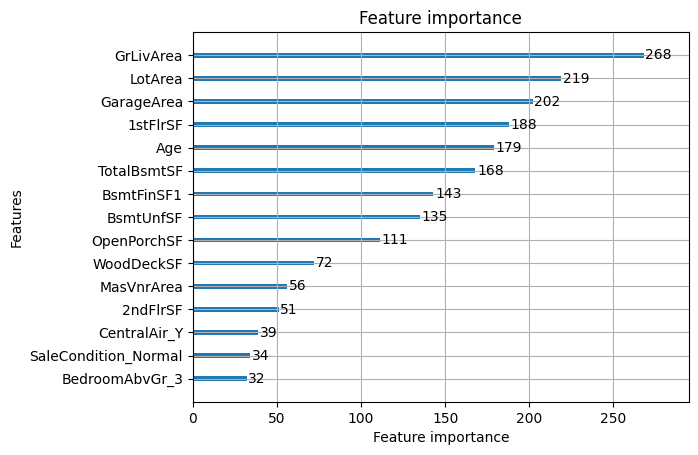

In [60]:
lightgbm.plot_importance(lgbm, max_num_features = 15);

In [61]:
X = df_extended_test.drop(["Id","SalePrice"],axis = 1)
y_result = lgbm.predict(X)
y_result = np.exp(y_result)

df_extended_test["SalePrice"] = y_result
df_extended_test[["Id","SalePrice"]]


/tmp/ipykernel_19/1951099090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_test["SalePrice"] = y_result


,Id,SalePrice
0,1461,146126.839206
1,1462,165331.196533
2,1463,207175.932793
3,1464,188229.386915
4,1465,246164.070629
...,...,...
1454,2915,135389.139585
1455,2916,135178.864897
1456,2917,232385.489624
1457,2918,189852.485251


In [62]:
df_extended_test[["Id","SalePrice"]].to_csv("house-price-ms.csv")

In [63]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'root_mean_squared_error',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [64]:
from sklearn.model_selection import GridSearchCV
y = np.log(df_extended_train["SalePrice"])
X = df_extended_train.drop(["Id","SalePrice"],axis = 1)

lgbm_params = {
              'min_child_weight':[0.001,0.002,0.003],
              'min_child_samples':[20,30,40,50],
               'learning_rate':[0.1,0.2,0.3]
              }
lgbm_best = GridSearchCV(lgbm,
                              lgbm_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [65]:
lgbm_best.best_params_

{'learning_rate': 0.1, 'min_child_samples': 30, 'min_child_weight': 0.001}

In [66]:
X = df_extended_test.drop(["Id","SalePrice"],axis = 1)
y_result = lgbm_best.predict(X)
y_result = np.exp(y_result)

df_extended_test["SalePrice"] = y_result
df_extended_test[["Id","SalePrice"]]

/tmp/ipykernel_19/3605021602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_test["SalePrice"] = y_result


,Id,SalePrice
0,1461,140524.176053
1,1462,158328.834819
2,1463,205891.993230
3,1464,202035.000529
4,1465,241408.256281
...,...,...
1454,2915,126045.711023
1455,2916,134722.629016
1456,2917,220751.975885
1457,2918,189246.468583


In [67]:
df_extended_test[["Id","SalePrice"]].to_csv("house-price-ms-best-params.csv")